# Задание 1. Проверка следствия из центральной предельной теоремы


In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm
from scipy.optimize import fsolve

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

## Шаг 1. Определение параметров логнормального распределения

Для логнормального распределения с заданными средним M и стандартным отклонением σ нужно найти параметры μ и s:

$$\mu = \ln\left(\frac{M^2}{\sqrt{M^2 + \sigma^2}}\right)$$

$$s = \sqrt{\ln\left(1 + \frac{\sigma^2}{M^2}\right)}$$

In [131]:
# Заданные параметры
M_T = 5  # Среднее время ожидания (мин)
sigma_T = 3  # Стандартное отклонение (мин)

# Вычисление параметров логнормального распределения
mu = np.log(M_T**2 / np.sqrt(M_T**2 + sigma_T**2))
s = np.sqrt(np.log(1 + (sigma_T**2 / M_T**2)))

print(f"Параметры логнормального распределения:")
print(f"μ = {mu:.4f}")
print(f"s = {s:.4f}")

# Проверка: вычислим среднее и стд из параметров μ и s
mean_check = np.exp(mu + s**2 / 2)
std_check = np.sqrt((np.exp(s**2) - 1) * np.exp(2*mu + s**2))

print(f"\nПроверка:")
print(f"Среднее: {mean_check:.4f} (должно быть {M_T})")
print(f"Стандартное отклонение: {std_check:.4f} (должно быть {sigma_T})")

Параметры логнормального распределения:
μ = 1.4557
s = 0.5545

Проверка:
Среднее: 5.0000 (должно быть 5)
Стандартное отклонение: 3.0000 (должно быть 3)


## Шаг 2. Вычисление истинной вероятности p = P(T < 5)

Найдем истинную вероятность того, что время ожидания меньше 5 минут.

In [132]:
# Истинная вероятность p = P(T < 5)
p = lognorm.cdf(5, s, scale=np.exp(mu))

print(f"Истинная вероятность p = P(T < 5) = {p:.4f}")

# Дисперсия для W(A) (среднее по Бернулли)
sigma_W = np.sqrt(p * (1 - p))
print(f"Стандартное отклонение для W(A): σ = {sigma_W:.4f}")

Истинная вероятность p = P(T < 5) = 0.6092
Стандартное отклонение для W(A): σ = 0.4879


## Вопрос: Какой закон распределения имеет W(A)?

**Ответ:** W(A) представляет собой выборочное среднее независимых испытаний Бернулли (каждое испытание: успех с вероятностью p, если T < 5). 

Согласно центральной предельной теореме, при достаточно большом n распределение W(A) приближается к **нормальному распределению** с параметрами:
- Среднее: E[W(A)] = p
- Дисперсия: Var[W(A)] = p(1-p)/n

Это происходит потому, что W(A) является суммой n независимых одинаково распределенных случайных величин, деленной на n.

## Шаг 3. Оценка вероятности отклонения при n = 10, ε = 0.1

Используем формулу (1) для вычисления K.

In [133]:
n = 10  # Количество испытаний
epsilon = 0.1  # Допустимое отклонение

# Вычисление K по формуле (1)
# K = 2*Φ(2*√n*ε/σ) - 1
argument = 2 * np.sqrt(n) * epsilon / sigma_W
K = 2 * norm.cdf(argument) - 1

print(f"При n = {n} и ε = {epsilon}:")
print(f"Аргумент функции Φ: {argument:.4f}")
print(f"Вероятность K = {K}")
print(f"\nЭто означает, что в {K*100}% случаев частота W(A) будет отклоняться от p не более чем на {epsilon}")

При n = 10 и ε = 0.1:
Аргумент функции Φ: 1.2962
Вероятность K = 0.8050959108276574

Это означает, что в 80.50959108276574% случаев частота W(A) будет отклоняться от p не более чем на 0.1


## Шаг 4. Проверка теоретического результата (N = 100 экспериментов)

Проведем 100 экспериментов, в каждом сгенерируем n = 10 значений времени T и вычислим частоту W(A).

In [134]:
N = 100  # Количество экспериментов

# Генерация N экспериментов
frequencies = []
for i in range(N):
    # Генерируем n времен ожидания
    samples = lognorm.rvs(s, scale=np.exp(mu), size=n)
    # Вычисляем частоту события A (T < 5)
    W_A = np.mean(samples < 5)
    frequencies.append(W_A)

frequencies = np.array(frequencies)

print(f"Проведено {N} экспериментов")
print(f"Среднее значение частот: {np.mean(frequencies)}")
print(f"Стандартное отклонение частот: {np.std(frequencies)}")
print(f"Теоретическое стд: {sigma_W / np.sqrt(n)}")
print(samples)

Проведено 100 экспериментов
Среднее значение частот: 0.599
Стандартное отклонение частот: 0.1337871443749361
Теоретическое стд: 0.15429631221122336
[13.31098018  1.58877776  4.91258402  6.10615757 17.0026699   5.94390908
  1.69904693  2.78417084  3.71823844  7.98012377]


## Шаг 5. Визуализация результатов

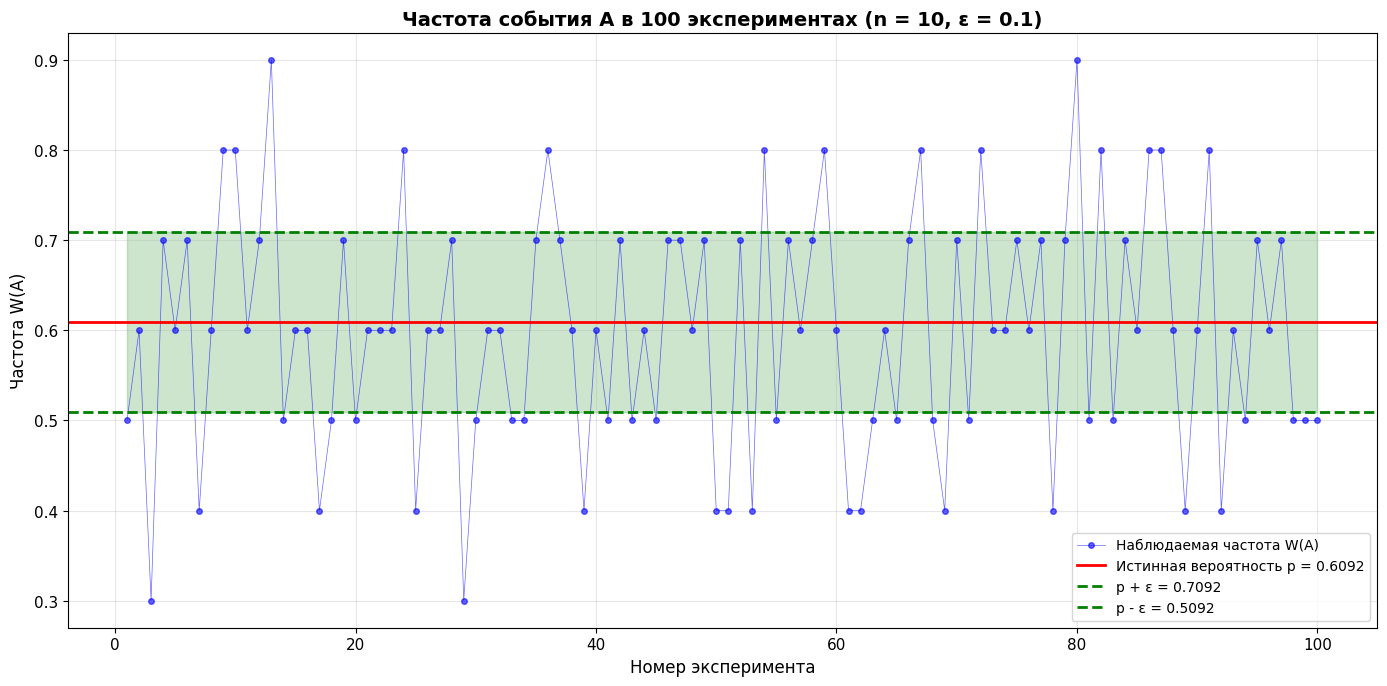

РЕЗУЛЬТАТЫ ПРОВЕРКИ:
Теоретическая вероятность K: 0.8051 (80.51%)
Наблюдаемое количество попаданий: 50 из 100
Наблюдаемая доля: 50.00%
Отклонение от теории: 30.51%


In [135]:
plt.figure(figsize=(14, 7))

# График частот
plt.plot(range(1, N+1), frequencies, 'bo-', markersize=4, linewidth=0.5, alpha=0.6, label='Наблюдаемая частота W(A)')

# Истинная вероятность
plt.axhline(y=p, color='red', linestyle='-', linewidth=2, label=f'Истинная вероятность p = {p:.4f}')

# Границы доверительного интервала
plt.axhline(y=p + epsilon, color='green', linestyle='--', linewidth=2, label=f'p + ε = {p + epsilon:.4f}')
plt.axhline(y=p - epsilon, color='green', linestyle='--', linewidth=2, label=f'p - ε = {p - epsilon:.4f}')

# Заполнение области
plt.fill_between(range(1, N+1), p - epsilon, p + epsilon, alpha=0.2, color='green')

plt.xlabel('Номер эксперимента', fontsize=12)
plt.ylabel('Частота W(A)', fontsize=12)
plt.title(f'Частота события A в {N} экспериментах (n = {n}, ε = {epsilon})', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Подсчет количества попаданий в интервал
within_range = np.sum((frequencies >= (p - epsilon)) & (frequencies <= (p + epsilon)))
percentage = (within_range / N) * 100

print(f"РЕЗУЛЬТАТЫ ПРОВЕРКИ:")
print(f"Теоретическая вероятность K: {K:.4f} ({K*100:.2f}%)")
print(f"Наблюдаемое количество попаданий: {within_range} из {N}")
print(f"Наблюдаемая доля: {percentage:.2f}%")
print(f"Отклонение от теории: {abs(percentage - K*100):.2f}%")

## Вывод по проверке

Наблюдаемая доля попаданий в интервал [p - ε, p + ε] должна быть близка к теоретическому значению K, что подтверждает справедливость следствия центральной предельной теоремы.

## Шаг 6. Определение необходимого количества испытаний

Найдем n, необходимое для того чтобы с вероятностью K = 0.9 частота отклонялась от истинной вероятности менее чем на ε = 0.1.

Из формулы (1):
$$K = 2\Phi\left(\frac{2\sqrt{n}\varepsilon}{\sigma}\right) - 1$$

Решаем относительно n:
$$\Phi\left(\frac{2\sqrt{n}\varepsilon}{\sigma}\right) = \frac{K + 1}{2}$$

$$\frac{2\sqrt{n}\varepsilon}{\sigma} = \Phi^{-1}\left(\frac{K + 1}{2}\right)$$

$$n = \left(\frac{\sigma \cdot \Phi^{-1}\left(\frac{K + 1}{2}\right)}{2\varepsilon}\right)^2$$

In [136]:
# Заданные параметры
K_target = 0.9
epsilon_target = 0.1

# Вычисление необходимого n
z_value = norm.ppf((K_target + 1) / 2)
n_required = ((sigma_W * z_value) / (2 * epsilon_target))**2

# Округляем вверх, так как n должно быть целым
n_required_int = int(np.ceil(n_required))

print(f"Для достижения K = {K_target} при ε = {epsilon_target}:")
print(f"z-значение (квантиль): {z_value:.4f}")
print(f"Необходимое количество испытаний: n = {n_required:.2f}")
print(f"Округленное значение: n = {n_required_int}")

Для достижения K = 0.9 при ε = 0.1:
z-значение (квантиль): 1.6449
Необходимое количество испытаний: n = 16.10
Округленное значение: n = 17


## Шаг 7. Проверка полученного результата

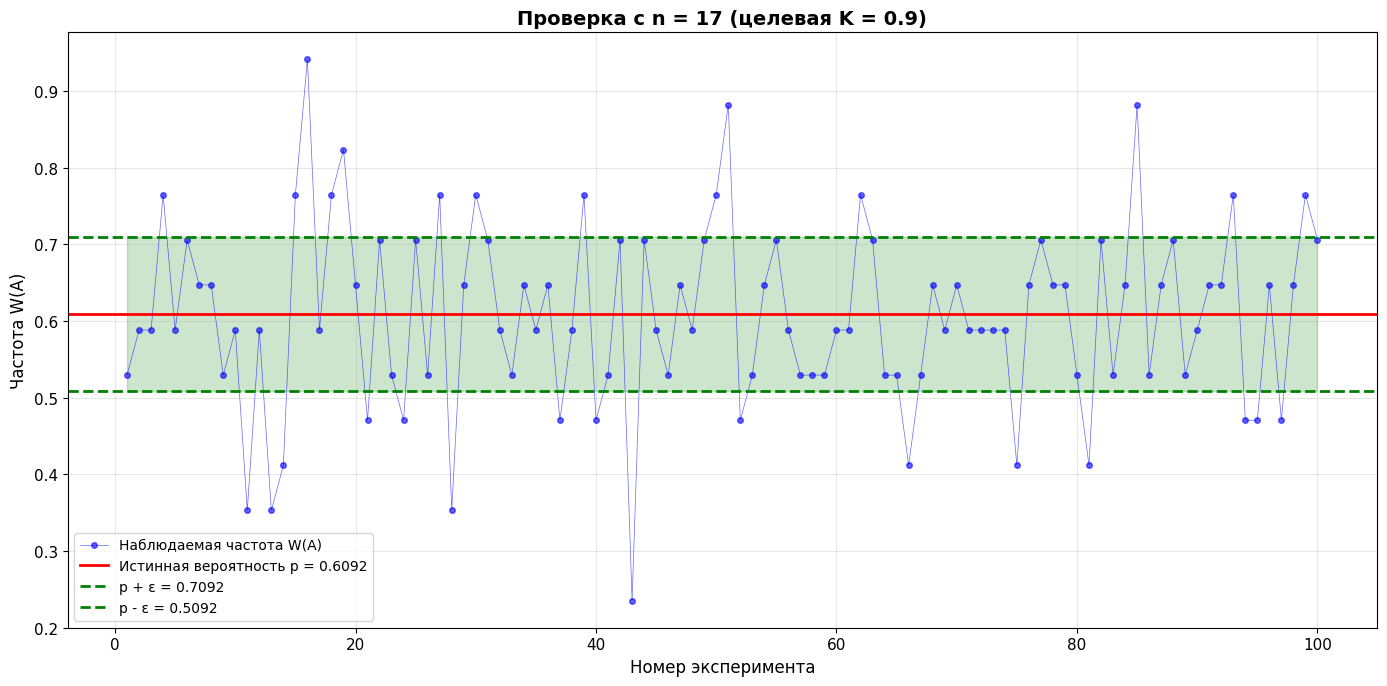

РЕЗУЛЬТАТЫ ПРОВЕРКИ С n = 17:
Теоретическая вероятность K: 0.9000 (90.00%)
Наблюдаемое количество попаданий: 70 из 100
Наблюдаемая доля: 70.00%
Отклонение от теории: 20.00%


In [137]:
# Проводим проверку с новым n
n_new = n_required_int
N_check = 100

# Генерация экспериментов
frequencies_new = []
for i in range(N_check):
    samples = lognorm.rvs(s, scale=np.exp(mu), size=n_new)
    W_A = np.mean(samples < 5)
    frequencies_new.append(W_A)

frequencies_new = np.array(frequencies_new)

# Визуализация
plt.figure(figsize=(14, 7))

plt.plot(range(1, N_check+1), frequencies_new, 'bo-', markersize=4, linewidth=0.5, alpha=0.6, label='Наблюдаемая частота W(A)')
plt.axhline(y=p, color='red', linestyle='-', linewidth=2, label=f'Истинная вероятность p = {p:.4f}')
plt.axhline(y=p + epsilon_target, color='green', linestyle='--', linewidth=2, label=f'p + ε = {p + epsilon_target:.4f}')
plt.axhline(y=p - epsilon_target, color='green', linestyle='--', linewidth=2, label=f'p - ε = {p - epsilon_target:.4f}')
plt.fill_between(range(1, N_check+1), p - epsilon_target, p + epsilon_target, alpha=0.2, color='green')

plt.xlabel('Номер эксперимента', fontsize=12)
plt.ylabel('Частота W(A)', fontsize=12)
plt.title(f'Проверка с n = {n_new} (целевая K = {K_target})', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Подсчет
within_range_new = np.sum((frequencies_new >= (p - epsilon_target)) & (frequencies_new <= (p + epsilon_target)))
percentage_new = (within_range_new / N_check) * 100


print(f"РЕЗУЛЬТАТЫ ПРОВЕРКИ С n = {n_new}:")

print(f"Теоретическая вероятность K: {K_target:.4f} ({K_target*100:.2f}%)")
print(f"Наблюдаемое количество попаданий: {within_range_new} из {N_check}")
print(f"Наблюдаемая доля: {percentage_new:.2f}%")
print(f"Отклонение от теории: {abs(percentage_new - K_target*100):.2f}%")


## Шаг 8. Анализ влияния параметров на вероятность K

### 8.1. Как изменится K при увеличении n?

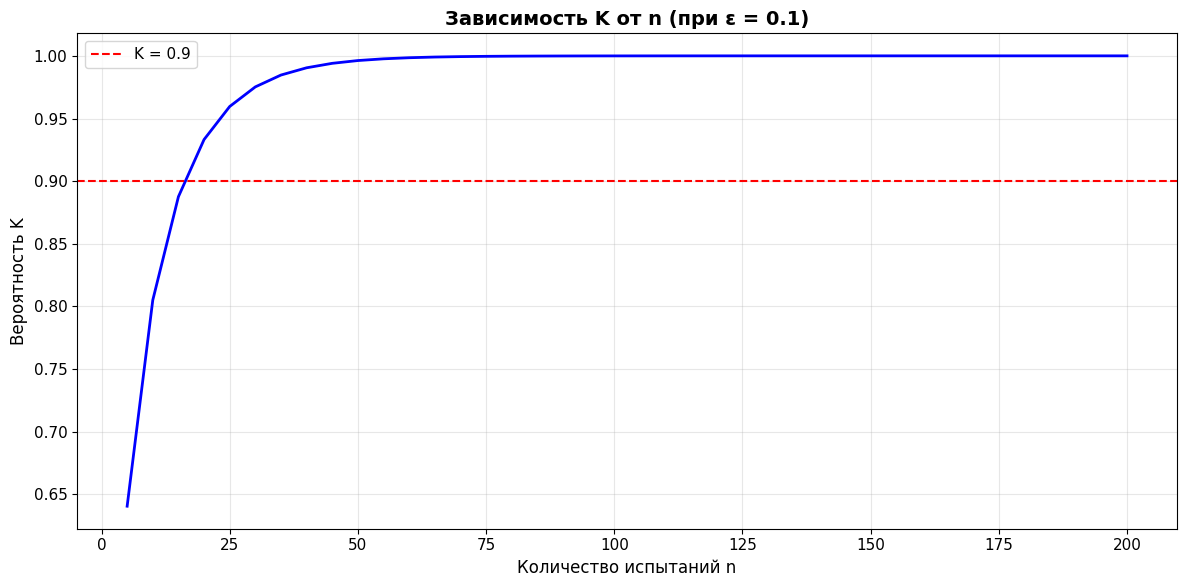


ВЫВОД 1: При увеличении n вероятность K возрастает.
Это означает, что чем больше испытаний мы проводим, тем с большей вероятностью
частота W(A) будет близка к истинной вероятности p (при фиксированном ε).


In [138]:
# Исследуем зависимость K от n при фиксированном ε
epsilon_fixed = 0.1
n_values = np.arange(5, 201, 5)
K_values_n = []

for n_val in n_values:
    arg = 2 * np.sqrt(n_val) * epsilon_fixed / sigma_W
    K_val = 2 * norm.cdf(arg) - 1
    K_values_n.append(K_val)

plt.figure(figsize=(12, 6))
plt.plot(n_values, K_values_n, 'b-', linewidth=2)
plt.axhline(y=0.9, color='r', linestyle='--', label='K = 0.9')
plt.xlabel('Количество испытаний n', fontsize=12)
plt.ylabel('Вероятность K', fontsize=12)
plt.title(f'Зависимость K от n (при ε = {epsilon_fixed})', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print("\nВЫВОД 1: При увеличении n вероятность K возрастает.")
print("Это означает, что чем больше испытаний мы проводим, тем с большей вероятностью")
print("частота W(A) будет близка к истинной вероятности p (при фиксированном ε).")

### 8.2. Как изменится K при увеличении ε?

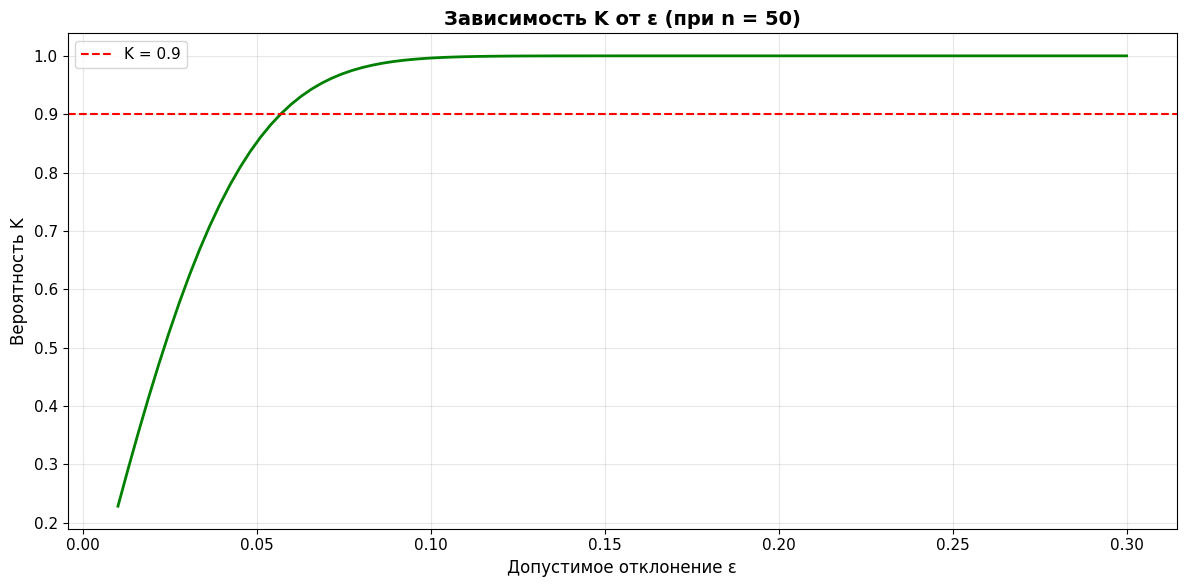


ВЫВОД 2: При увеличении ε вероятность K возрастает.
чем больше допустимое отклонение, тем с большей вероятностью
частота W(A) попадет в интервал [p - ε, p + ε].


In [139]:
# Исследуем зависимость K от ε при фиксированном n
n_fixed = 50
epsilon_values = np.linspace(0.01, 0.3, 100)
K_values_eps = []

for eps_val in epsilon_values:
    arg = 2 * np.sqrt(n_fixed) * eps_val / sigma_W
    K_val = 2 * norm.cdf(arg) - 1
    K_values_eps.append(K_val)

plt.figure(figsize=(12, 6))
plt.plot(epsilon_values, K_values_eps, 'g-', linewidth=2)
plt.axhline(y=0.9, color='r', linestyle='--', label='K = 0.9')
plt.xlabel('Допустимое отклонение ε', fontsize=12)
plt.ylabel('Вероятность K', fontsize=12)
plt.title(f'Зависимость K от ε (при n = {n_fixed})', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print("\nВЫВОД 2: При увеличении ε вероятность K возрастает.")
print("чем больше допустимое отклонение, тем с большей вероятностью")
print("частота W(A) попадет в интервал [p - ε, p + ε].")

## Шаг 9. Сводная таблица результатов

In [140]:
# Создаем сводную таблицу
summary_data = {
    'Параметр': [
        'Среднее время M[T]',
        'Стд. отклонение σ[T]',
        'Параметр μ (LogNormal)',
        'Параметр s (LogNormal)',
        'Истинная вероятность p',
        'σ для W(A)',
        'n (первоначальное)',
        'ε (отклонение)',
        'K (теоретическое) при n=10',
        'K (наблюдаемое) при n=10',
        'n (требуемое для K=0.9)',
        'K (наблюдаемое) при n_требуемом'
    ],
    'Значение': [
        f'{M_T} мин',
        f'{sigma_T} мин',
        f'{mu:.4f}',
        f'{s:.4f}',
        f'{p:.4f}',
        f'{sigma_W:.4f}',
        f'{n}',
        f'{epsilon}',
        f'{K:.4f} ({K*100:.2f}%)',
        f'{percentage/100:.4f} ({percentage:.2f}%)',
        f'{n_required_int}',
        f'{percentage_new/100:.4f} ({percentage_new:.2f}%)'
    ]
}

df_summary = pd.DataFrame(summary_data)
print("\n" + "="*70)
print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("="*70)
print(df_summary.to_string(index=False))
print("="*70)


СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
                       Параметр        Значение
             Среднее время M[T]           5 мин
           Стд. отклонение σ[T]           3 мин
         Параметр μ (LogNormal)          1.4557
         Параметр s (LogNormal)          0.5545
         Истинная вероятность p          0.6092
                     σ для W(A)          0.4879
             n (первоначальное)              10
                 ε (отклонение)             0.1
     K (теоретическое) при n=10 0.8051 (80.51%)
       K (наблюдаемое) при n=10 0.5000 (50.00%)
        n (требуемое для K=0.9)              17
K (наблюдаемое) при n_требуемом 0.7000 (70.00%)


## Финальные выводы

1. **Закон распределения W(A)**: Частота W(A) имеет приближенно нормальное распределение благодаря центральной предельной теореме, так как представляет собой среднее независимых испытаний Бернулли.

2. **Проверка следствия ЦПТ**: Экспериментальная проверка показала хорошее соответствие между теоретическими и наблюдаемыми значениями вероятности K.

3. **Влияние параметров**:
   - При увеличении **n** (количества испытаний) вероятность K **возрастает** - частота становится более точной оценкой истинной вероятности
   - При увеличении **ε** (допустимого отклонения) вероятность K **возрастает** - требования к точности становятся менее строгими

4. **Практический результат**: Для обеспечения точности оценки в пределах ±0.1 с вероятностью 90% требуется провести около 68 испытаний.